In [ ]:
###
    # This code is to plot the histograms of monthly soil temperature near the freezing point. 
    # Selected data from the closest model levels to 1.6, 2.4, and 3.2 m.
    # For each model, all grid cells north of 60°N during the historical period (1982–2014) are included.
    # Plot the soil temperature distribution.
    # Output: Figure S3.
###

In [1]:
import numpy as np
import xarray as xr
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

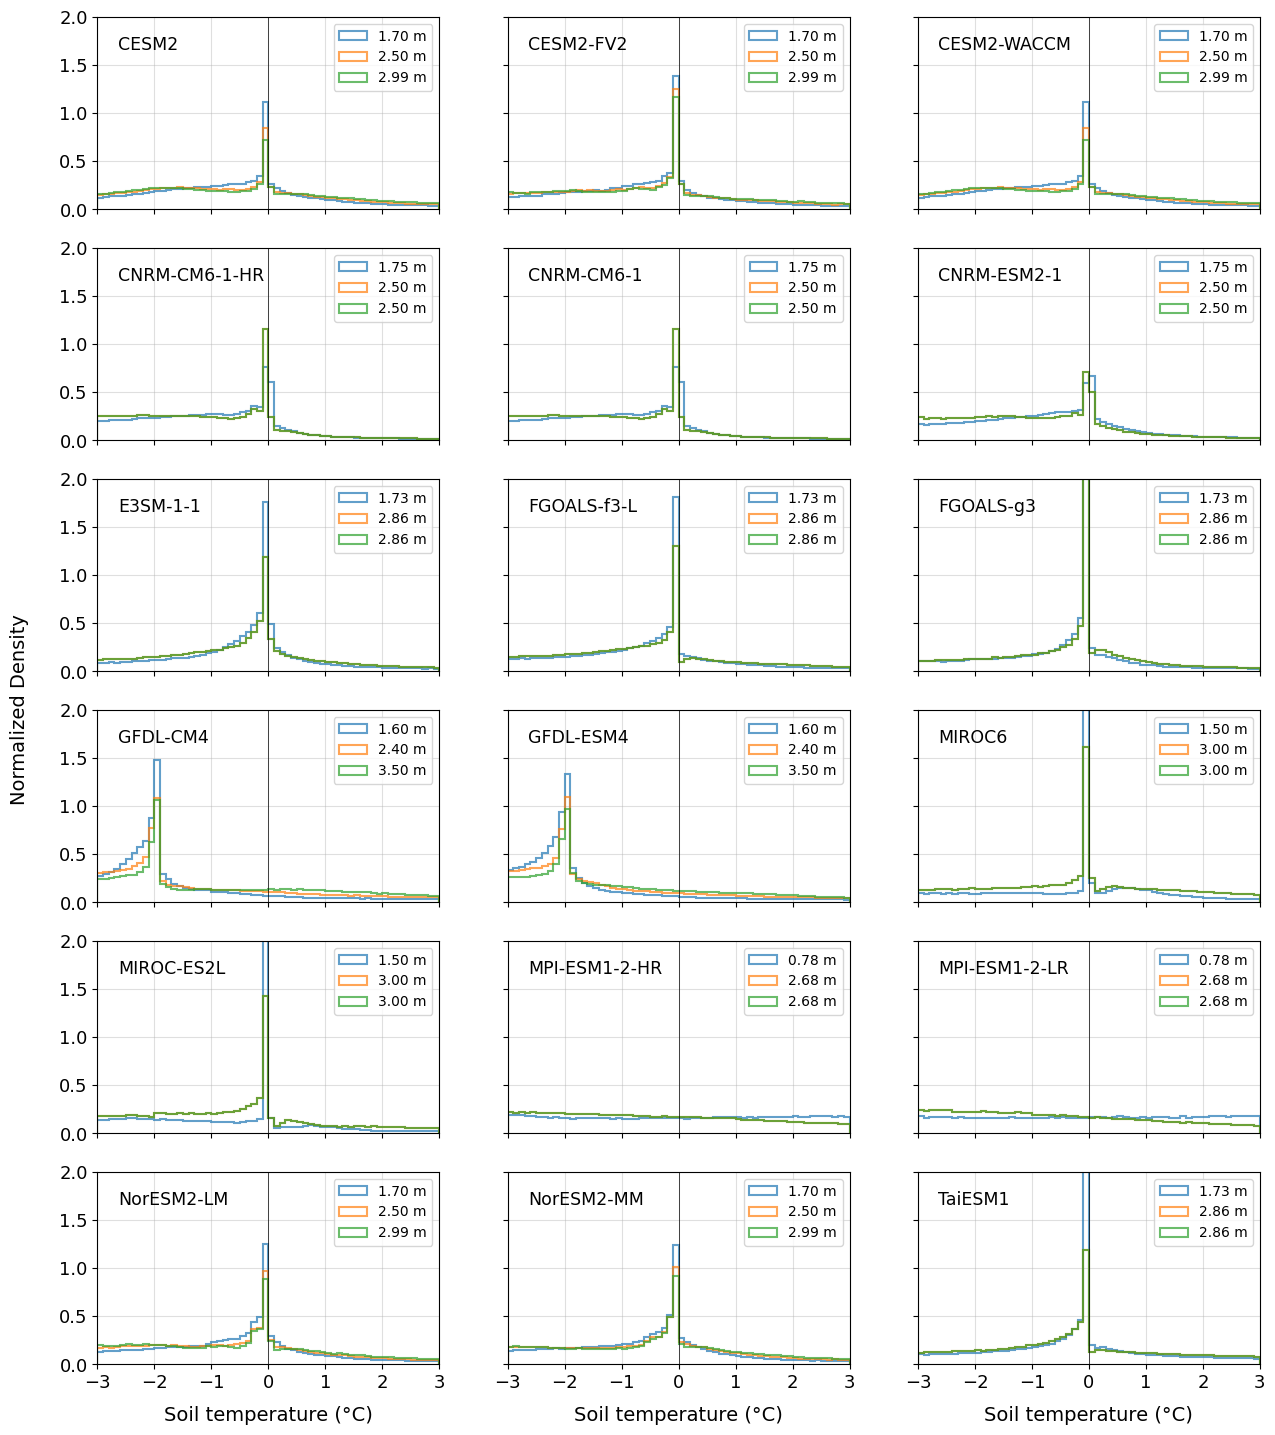

In [ ]:
model = ["CESM2","CESM2-FV2","CESM2-WACCM","CNRM-CM6-1-HR","CNRM-CM6-1","CNRM-ESM2-1",
         "E3SM-1-1","FGOALS-f3-L","FGOALS-g3","GFDL-CM4","GFDL-ESM4","MIROC6","MIROC-ES2L","MPI-ESM1-2-HR","MPI-ESM1-2-LR",
         "NorESM2-LM","NorESM2-MM","TaiESM1"]

target_depths = [1.6, 2.4, 3.2]

# Histogram range
bin_edges = np.arange(-3, 3.1, 0.1) 

# Create subplots
fig, axes = plt.subplots(6, 3, figsize=(15, 17.5), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i in range(len(model)):
    modelname = model[i]

    if modelname == 'TaiESM1':
        nc_file = "/home/wangjx/Data/CMIP6_tas_tsl_1850_2100/tsl_TaiESM1_r1i1p1f1_185001-210012.nc"
    else:
        nc_file = glob.glob("/home/jidy/Data/tas-tsl-merge/tsl_" + modelname + "*.nc")[0]

    # Extract variables
    ds = xr.open_dataset(nc_file)
    tsl = ds['tsl'][1584:1980, :, :, :]  # 1982-2014
    lat = ds['lat']
    lon = ds['lon']
    tsl_north_60 = tsl.sel(lat=tsl['lat'] >= 60)
    
    # Find the data closest to the target depths
    depths = tsl_north_60['depth']
    closest_levels = [np.abs(depths - target).argmin().item() for target in target_depths]
    tsl_selected = tsl_north_60.isel(depth=closest_levels)
    depths = tsl_selected['depth'].values

    # Prepare data for histograms
    tsl_data = tsl_selected.values - 273.15  # shape:(time, depth, lat, lon)
    flattened_tsl = [tsl_data[:, i, :, :].ravel() for i in range(len(depths))]
    
    # Plot histograms on subplots
    ax = axes[i]
    for j, depth in enumerate(depths):
        ax.hist(flattened_tsl[j], bins=bin_edges, alpha=0.7, 
                label=f"{depth:.2f} m", density=True, histtype='step', linewidth=1.5)
    
    # Add a vertical black line at x=0
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

    # Add a title inside the subplot at the top left
    ax.text(0.06, 0.9, modelname, fontsize=12.5, 
            transform=ax.transAxes, ha='left', va='top')
 
    ax.grid(True,alpha = 0.4)
    if i % 3 == 0:
        ax.tick_params(axis='y', labelsize=13)
    if i == 9:
        ax.set_ylabel("Normalized Density", fontsize=14)
        ax.yaxis.set_label_coords(-0.2, 1)
        ax.yaxis.labelpad = 15  

    if i >= 15:
        ax.set_xlabel("Soil temperature (°C)", fontsize=14)
        ax.xaxis.labelpad = 10 
        ax.tick_params(axis='x', labelsize=13)

    ax.legend(fontsize=10)
    plt.xlim(-3, 3)
    plt.ylim(0, 2) 

plt.show()

In [3]:
fig.savefig("../Figures/FigureS3.png", bbox_inches='tight',dpi=300)